In [1]:
import pandas as pd
import pickle
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
with open('tmp2.p','rb') as f:
    df = pickle.load(f)

In [3]:
df.head()

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_learning_rate,param_max_depth,param_n_estimators,params,rank_test_score,split0_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,1.985400,0.018752,0.958207,0.964109,0.001,4,300,"{'learning_rate': 0.001, 'max_depth': 4, 'n_es...",120,0.935214,...,0.961990,0.963843,0.956853,0.964104,0.963795,0.961975,0.117093,0.011694,0.012657,0.001328
1,6.944815,0.050007,0.967856,0.972247,0.001,4,1000,"{'learning_rate': 0.001, 'max_depth': 4, 'n_es...",116,0.954382,...,0.969274,0.973239,0.965758,0.971285,0.971769,0.971494,0.234883,0.006257,0.007853,0.001049
2,20.480298,0.143766,0.974103,0.979619,0.001,4,3000,"{'learning_rate': 0.001, 'max_depth': 4, 'n_es...",108,0.965208,...,0.973876,0.980389,0.971265,0.979668,0.978466,0.978949,0.374858,0.018226,0.005728,0.001320
3,32.450318,0.215648,0.977680,0.984944,0.001,4,4500,"{'learning_rate': 0.001, 'max_depth': 4, 'n_es...",85,0.967818,...,0.979259,0.985958,0.975247,0.986265,0.981461,0.983260,0.460455,0.018224,0.005799,0.001179
4,51.261693,0.340660,0.981536,0.991009,0.001,4,6800,"{'learning_rate': 0.001, 'max_depth': 4, 'n_es...",35,0.970310,...,0.982913,0.992385,0.979967,0.991205,0.986733,0.989850,0.901301,0.025004,0.006265,0.000967


In [28]:
import plotly.plotly as py
import plotly.graph_objs as go
import plotly
plotly.tools.set_credentials_file(username='Esas', api_key='bqje11USGEvs9IZIcuUn')
x= np.log(list(tmp.param_learning_rate))
y= np.log(list(tmp.param_n_estimators))
z = 1/(1-tmp.mean_test_score)
trace1 = go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers',
    marker=dict(
        size=12,
        line=dict(
            color='rgba(217, 217, 217, 0.14)',
            width=0.5
        ),
        opacity=0.8
    )
)

fig = go.Figure(data=[trace1])
py.iplot(fig, filename='simple-3d-scatter')

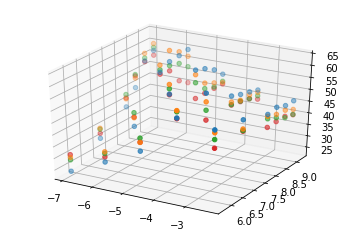

In [4]:
fig = plt.figure()
ax = fig.gca(projection='3d')
for n in df.param_max_depth.unique():
    tmp=df[df.param_max_depth==n]
    ax.scatter(np.log(list(tmp.param_learning_rate)),
               np.log(list(tmp.param_n_estimators)),
                1/(1-tmp.mean_test_score))

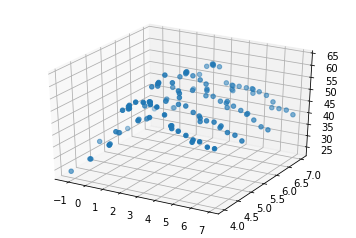

In [12]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(np.log(list(df.param_learning_rate*df.param_n_estimators)),
            df.param_max_depth,
            1/(1-df.mean_test_score));

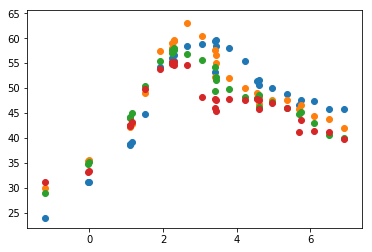

In [14]:
fig = plt.figure()
ax = fig.gca()
for n in df.param_max_depth.unique():
    tmp=df[df.param_max_depth==n]
    ax.scatter(np.log(list(tmp.param_learning_rate*tmp.param_n_estimators)),
            1/(1-tmp.mean_test_score))